In [1]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow import keras


2024-08-08 18:56:19.591977: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/catarinavuzi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### **Comparing the model performance**

- In this notebook we will compare the performance of the three models.Two from the selected models and the other one is the new base model

- The new basemodel based on the results from the roc curve shows a better performance than the than the  ResNet50 model and the DenseNet169 model.

- The ResNet50 model and the DenseNet169 model are plotted against each other. 

In [2]:
image_size = (224, 224)

batch_size = 10

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/Users/catarinavuzi/Downloads/cracked_uncracked_images",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 200 files belonging to 2 classes.
Using 160 files for training.
Using 40 files for validation.


2024-08-08 18:56:40.920058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


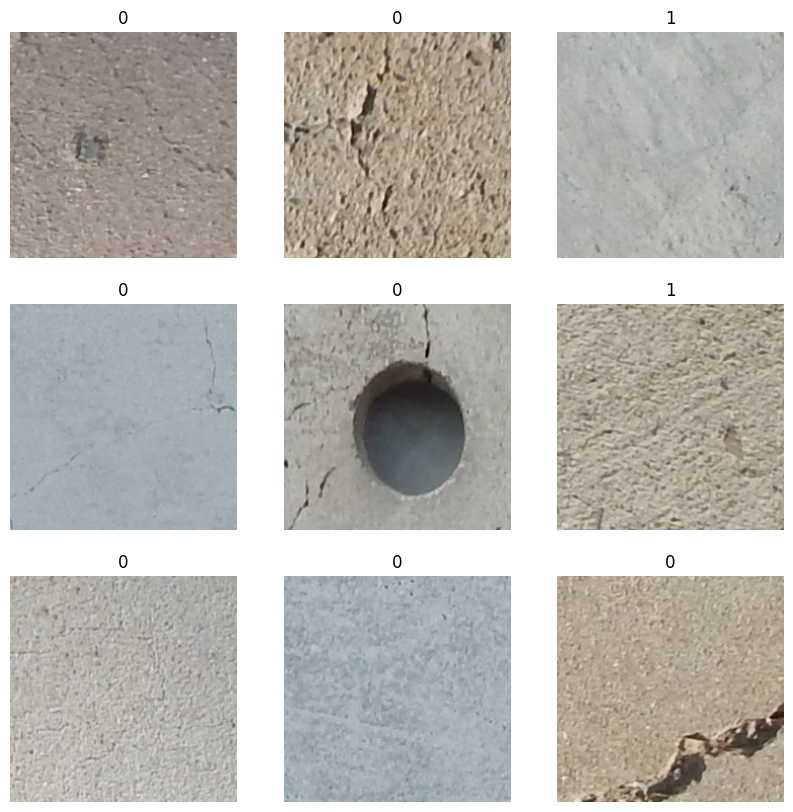

In [4]:
##Taking a look to the images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

#### Due to issues loading one of the model, I decided to copy and past the code for the model to this notebook here.

In [4]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

2024-08-08 16:10:28.680916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


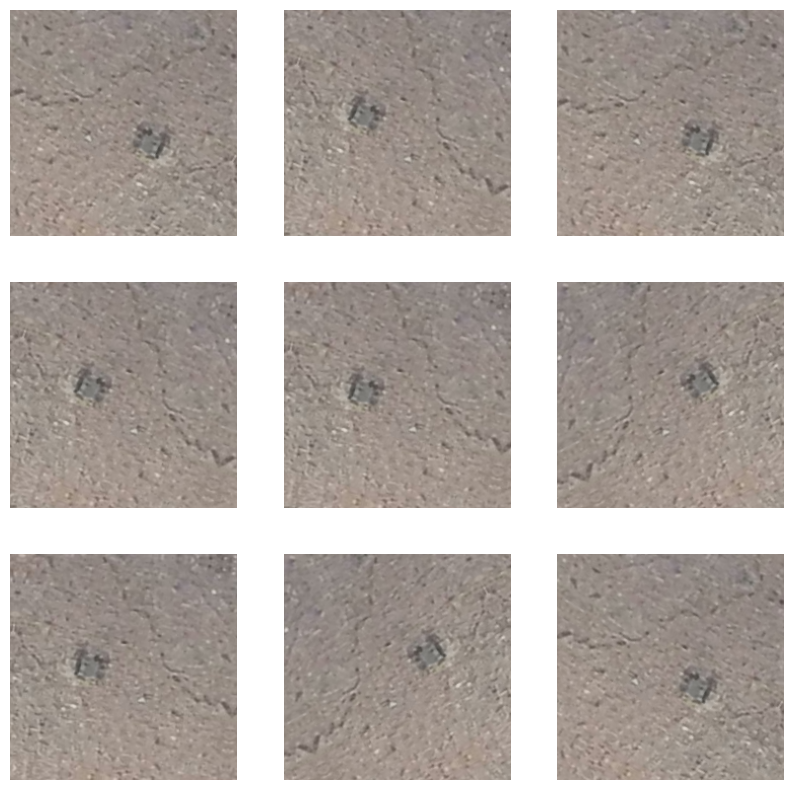

In [5]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [6]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

#### **Transfer Learning ResNet50**

In [19]:
# Save the model
model.save('make_transfer_model_Res.keras') # Use .keras or .h5 extension

# Load the model
loaded_model_res = keras.models.load_model('make_transfer_model_Res.keras')

In [9]:
# Load the model
loaded_model_res = keras.models.load_model('make_transfer_model_Res.keras')

In [10]:
##load the model
loaded_model_Dense = keras.models.load_model('make_transfer_model.keras')

In [11]:
# Load the model
loaded_model_2= keras.models.load_model('make_model_2.keras')

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 996ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 407ms/step


2024-08-08 19:00:11.063299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


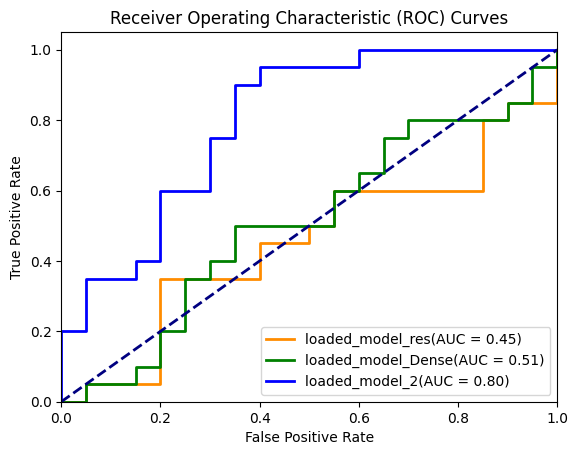

In [12]:
# Get predictions for the validation dataset
y_pred_1 =loaded_model_res.predict(val_ds)
y_pred_2 = loaded_model_Dense .predict(val_ds)
y_pred_3 = loaded_model_2.predict(val_ds)

# Assuming 'val_ds' has labels accessible as 'val_ds.labels'
y_true = []
for _, label in val_ds:
  y_true.extend(label.numpy())

y_true = np.array(y_true)

# Calculate ROC curves and AUC scores
fpr_1, tpr_1, _ = roc_curve(y_true, y_pred_1)
roc_auc_1 = auc(fpr_1, tpr_1)

fpr_2, tpr_2, _ = roc_curve(y_true, y_pred_2)
roc_auc_2 = auc(fpr_2, tpr_2)

fpr_3, tpr_3, _ = roc_curve(y_true, y_pred_3)
roc_auc_3 = auc(fpr_3, tpr_3)

# Plot ROC curves
plt.figure()
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label='loaded_model_res(AUC = %0.2f)' % roc_auc_1)
plt.plot(fpr_2, tpr_2, color='green', lw=2, label='loaded_model_Dense(AUC = %0.2f)' % roc_auc_2)
plt.plot(fpr_3, tpr_3, color='blue', lw=2, label='loaded_model_2(AUC = %0.2f)' % roc_auc_3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()